In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes,
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [4]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory.
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through
# the list of tuples and find the nearest city to those coordinates.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city
# using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether
# the found city is already in the cities list. If not, then we'll use the
# append() function to add it. We are doing this because among the 1,500 latitudes
# and longitudes, there might be duplicates, which will retrieve duplicate cities,
# and we want to be sure we capture only the unique cities.

In [8]:
# 6.2.3
# Make an API Call

#In our API_practice file, add a new cell after the code we wrote to get the unique cities from with the
# citipy module. In the new cell, we will import the Requests Library and your API key from the config.py file.

# Import the requests library.

import requests
requests.__version__


# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b00c1cb04545967b459e30d8ace9ab10


In [10]:
# 6.2.6
# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
# We will need to do the following:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

# Import Dependencies, and Initialize an Empty List and Counters

# At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement
# that references the beginning of the logging; and create counters for the record numbers, 1–50;
# and the set counter.

# We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

# Import your Requests Library and the weather_api_key.
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
# Also, import the datetime module using the following code:

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# In the code block, we have initialized the counters at 1 because we want the first iteration of the
# logging for each recorded response and the set to start at 1.
# Loop Through the List of Cities and Build the City URL
# Next, we need to iterate through our list of cities and begin building the URL for each city,
# while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and
# the index to tell us when we get to 50. We can also retrieve the city from the cities list
# and add it to the city_url by using indexing, as shown in the following code:

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
 #       set_count += 1
  #      record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]
    

# Every time we want to reference the city in our code, we need to use the indexing on the cities list.
# Unfortunately, this will cause programming errors when we are building the city_url because
# it adds the index, not the city name, to the city_url. To fix this issue, we need to create
# another for loop to get the city from the cities list.
# Instead of using two for loops, we can use the enumerate() method as an alternative way
# to iterate through the list of cities and retrieve both the index, and the city from the list.
# The syntax for the enumerate() method is the following: for i, item in enumerate(list):
# Let's use the enumerate() method to get the index of the city for logging purposes and
# the city for creating an endpoint URL. Add the following code below our counters.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Let's break down the code so we understand fully before continuing:
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0
# and if the index is greater than or equal to 50. If the statement is true, then the set_count
# and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are
# removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will
# find the corresponding weather data for the city instead of finding the weather data for the first part of
# the city name.
# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.
# Next, we will retrieve the data from the JSON weather response for each city.

# Note: When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse.
# If not, the script might stop at that moment and not finish getting all the data we need.

# Handle API Request Errors with try-except Blocks
# We have handled request errors for getting the response from a valid city with an API call
# using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.
# We'll add a try-except block to our code to prevent the API request from stopping prematurely if the
# city_weather request isn't a valid response. If the request isn't valid, the code will not find the
# first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"],
# and skip the city and continue to run.
# The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:
# try:
#   Do something
# except:
#   print("An exception occurred")


#We can add a try-except block to our code and, below the tryblock, we will parse the data from the JSON file and add the data to the cities list.
# Let's add a try block. Then, below the try block, do the following:
# Parse the JSON file.
# Assign variables for each piece of data we need.
# Add the data to the cities list in a dictionary format.
#Add the following code after record_count += 1.

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



#Let's review the code:

#We parse the JSON file for the current city.
#If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
#If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
#We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
#We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
#Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
# Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.
# IMPORTANT
# Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).
# Now you have all your code to perform the API calls for each city and parse the JSON data. Let's run the cell!

# As your code is running, your output should be similar to the following image:
#

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | barreirinhas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | warqla
City not found. Skipping...
Processing Record 14 of Set 1 | omboue
Processing Record 15 of Set 1 | bilma
Processing Record 16 of Set 1 | kuche
City not found. Skipping...
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | port li

Processing Record 34 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 35 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 36 of Set 4 | cooma
Processing Record 37 of Set 4 | ingham
Processing Record 38 of Set 4 | nabire
Processing Record 39 of Set 4 | hay river
Processing Record 40 of Set 4 | kirakira
Processing Record 41 of Set 4 | hisua
Processing Record 42 of Set 4 | guanica
Processing Record 43 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 46 of Set 4 | louny
Processing Record 47 of Set 4 | bud
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | road town
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | tongzi
Processing Record 4 of Set 5 | upernavik
Proce

Processing Record 21 of Set 8 | mnogovershinnyy
Processing Record 22 of Set 8 | pelym
Processing Record 23 of Set 8 | le port
Processing Record 24 of Set 8 | severobaykalsk
Processing Record 25 of Set 8 | kilindoni
Processing Record 26 of Set 8 | rudnogorsk
Processing Record 27 of Set 8 | babu
Processing Record 28 of Set 8 | yei
Processing Record 29 of Set 8 | itaituba
Processing Record 30 of Set 8 | ken caryl
Processing Record 31 of Set 8 | kesennuma
City not found. Skipping...
Processing Record 32 of Set 8 | tir pol
City not found. Skipping...
Processing Record 33 of Set 8 | koutsouras
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | maragogi
Processing Record 36 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | morros
Processing Record 39 of Set 8 | juneau
Processing Record 40 of Set 8 | florida
Processing Record 41 of Set 8 | sarangani
Processing Record 42 of Set 8 | iquique


Processing Record 8 of Set 12 | carbonear
Processing Record 9 of Set 12 | bongandanga
Processing Record 10 of Set 12 | hobyo
Processing Record 11 of Set 12 | porciuncula
Processing Record 12 of Set 12 | muzhi
Processing Record 13 of Set 12 | vadso
Processing Record 14 of Set 12 | mentok
City not found. Skipping...
Processing Record 15 of Set 12 | waddan
Processing Record 16 of Set 12 | yakima
Processing Record 17 of Set 12 | nemuro
Processing Record 18 of Set 12 | eldikan
City not found. Skipping...
Processing Record 19 of Set 12 | ushtobe
Processing Record 20 of Set 12 | ati
Processing Record 21 of Set 12 | surab
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | waingapu
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | touros
Processing Record 26 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 12 | batsfjord
Processing Record 28 of Set 12 | batagay
Processing Record 29 of Set 12 | bitung
Process

In [12]:
# After collecting all our data, we can tally the number of cities in the city_data array of dictionaries
# using the len() function.

# IMPORTANT
# If you didn't get more than 500 cities, run the code to generate random latitude and longitude
# combinations and all the code below it. Or increase the size of the latitude and longitude combinations.



In [13]:
# 6.2.7
# Create a DataFrame of City Weather Data

# You have the data in a list of dictionaries, which is a format that you can use to create a Pandas DataFrame. You will also need to export the DataFrame as a CSV file for Jack.
# Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

# REWIND
#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# n a new cell, add the following code to convert the array of dictionaries to a Pandas DataFrame and run the cell.

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,87.82,61,40,24.16,US,2021-07-12 23:43:58
1,Bluff,-46.6000,168.3333,45.48,81,75,9.13,NZ,2021-07-12 23:43:58
2,Busselton,-33.6500,115.3333,54.05,82,42,23.67,AU,2021-07-12 23:40:41
3,Butaritari,3.0707,172.7902,82.53,77,82,13.53,KI,2021-07-12 23:43:59
4,Hobart,-42.8794,147.3294,51.26,78,20,4.00,AU,2021-07-12 23:40:18
5,Tuktoyaktuk,69.4541,-133.0374,60.80,63,75,12.66,CA,2021-07-12 23:40:41
6,Pevek,69.7008,170.3133,40.17,85,41,3.87,RU,2021-07-12 23:43:59
7,Barreirinhas,-2.7469,-42.8264,78.98,80,65,8.10,BR,2021-07-12 23:44:00
8,Rikitea,-23.1203,-134.9692,73.78,74,1,12.12,PF,2021-07-12 23:44:00
9,Albany,42.6001,-73.9662,71.38,95,99,3.67,US,2021-07-12 23:37:21


In [18]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

# REWIND
#Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

#new_column_order = ["column2", "column4", "column1"]

#Then, we assign a new or the same DataFrame with new column order:

#df = df[new_column_order]

In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-07-12 23:43:58,20.8947,-156.4700,87.82,61,40,24.16
1,Bluff,NZ,2021-07-12 23:43:58,-46.6000,168.3333,45.48,81,75,9.13
2,Busselton,AU,2021-07-12 23:40:41,-33.6500,115.3333,54.05,82,42,23.67
3,Butaritari,KI,2021-07-12 23:43:59,3.0707,172.7902,82.53,77,82,13.53
4,Hobart,AU,2021-07-12 23:40:18,-42.8794,147.3294,51.26,78,20,4.00
5,Tuktoyaktuk,CA,2021-07-12 23:40:41,69.4541,-133.0374,60.80,63,75,12.66
6,Pevek,RU,2021-07-12 23:43:59,69.7008,170.3133,40.17,85,41,3.87
7,Barreirinhas,BR,2021-07-12 23:44:00,-2.7469,-42.8264,78.98,80,65,8.10
8,Rikitea,PF,2021-07-12 23:44:00,-23.1203,-134.9692,73.78,74,1,12.12
9,Albany,US,2021-07-12 23:37:21,42.6001,-73.9662,71.38,95,99,3.67


In [21]:
#Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV
# in a new folder for that file.
#In our World_Weather_Analysis folder, create a new folder called "weather_data."
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [ ]:
#The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

#We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we move on to graphing and statistical analysis, let's update our GitHub repository.

In [24]:
# 6.3.1 Plot Latitude vs. Temperature
# We are going to create a series of scatter plots for each weather parameter against the latitude for
# all the cities. The students will use these scatter plots to write a summary report on how different
# weather parameters change based on the latitude.

#We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.
# The first, latitude vs. maximum temperature, should look like the following scatter plot.

# Get Data for Plotting

#First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum
# temperature, humidity, cloudiness, and wind speed from all the cities. Add the following code to a
# new cell and run the cell.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [25]:
#our final scatter plot will need the current date in the title. To add the current date, we will need to import the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python library, so there is no need to install it.



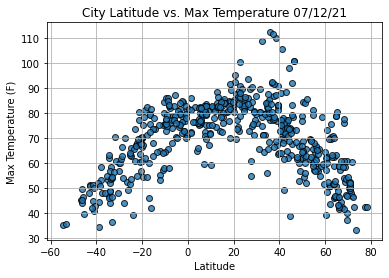

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
#The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.


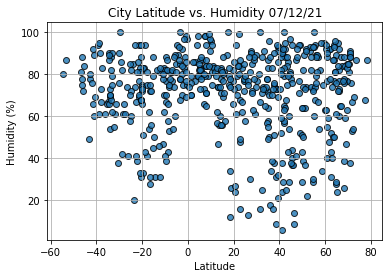

In [27]:
# 6.3.2 Plot Latitude vs. Humidity

# Great job on the first scatter plot! Now, you need to create a scatter plot that compares the latitude vs. the humidity.
#We can repurpose our code for the maximum temperature scatter plot and create a scatter plot for the latitude versus humidity.

# In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."


# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

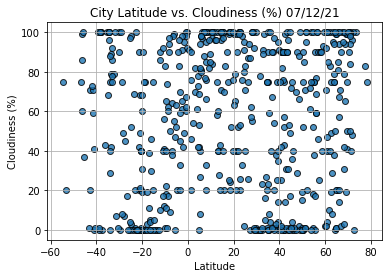

In [28]:
#6.3.3
#Plot Latitude vs. Cloudiness
#You have a few more plots to create, and you know that it's time to stay hyperfocused. Whenever you start reusing code, it gets a bit easier to make a mistake. These charts will be on a public website for all to see, so the stakes are high.
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

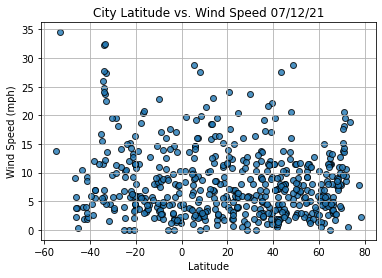

In [29]:
#6.3.4 Plot Latitude vs. Wind Speed

#You have one last scatter plot to make. If you can make it through this one, you'll be done with scatter plots for the day. Just be sure to upload them to GitHub so the team working on the STEM project can get them for the community outreach website!
#Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

